In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("dataset/sonar.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
print(df.shape)

(208, 61)


In [7]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
df.groupby(60).size()

60
M    111
R     97
dtype: int64

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubpl

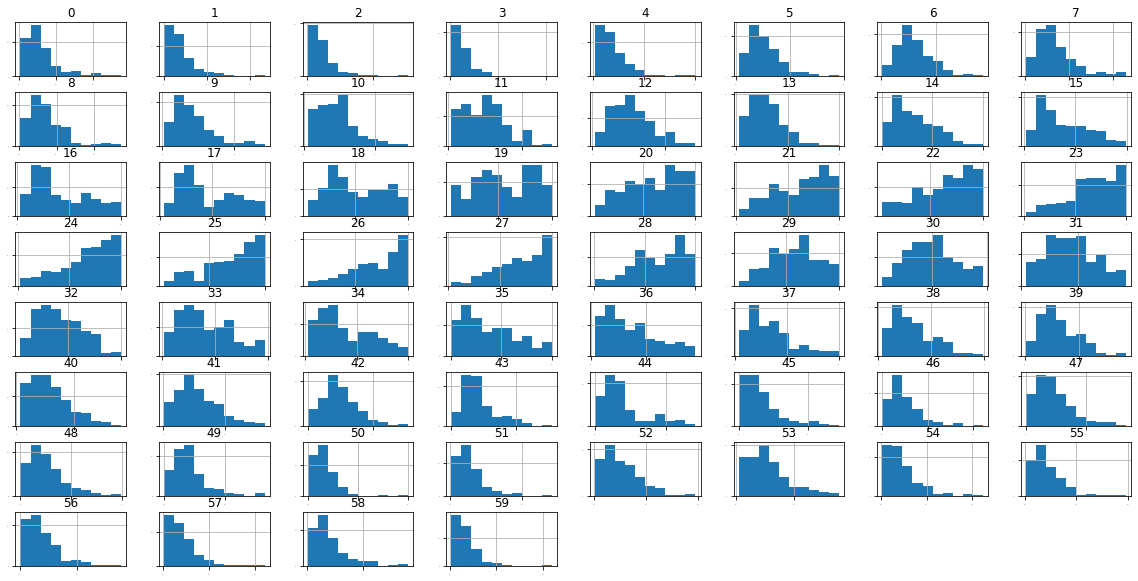

In [13]:
df.hist(figsize=(20,10), xlabelsize=1, ylabelsize=1)

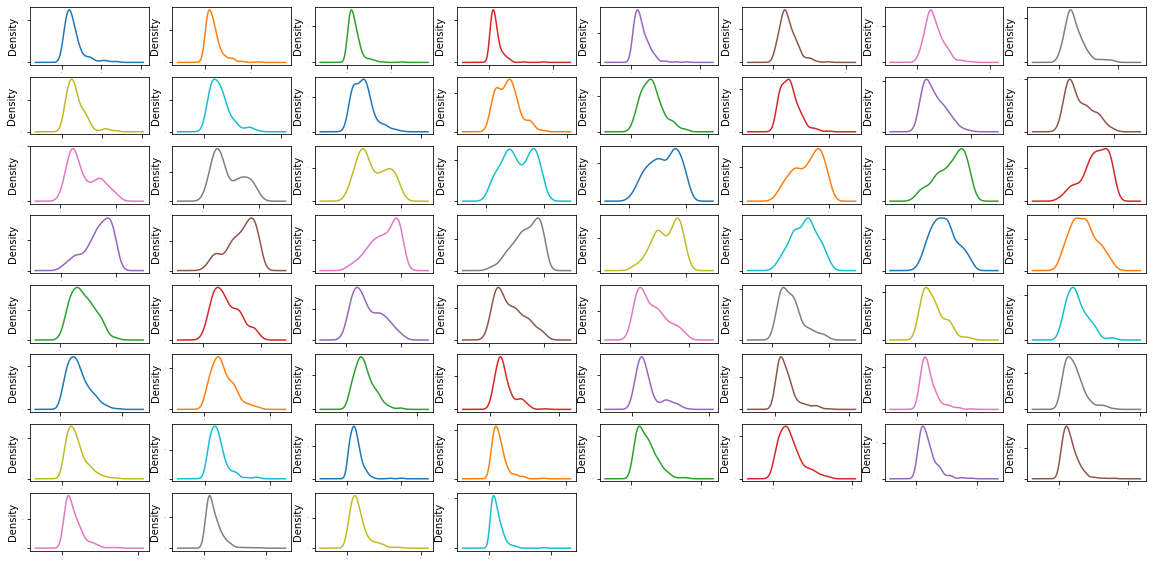

In [14]:
df.plot(kind='density', figsize=(20,10), subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

<AxesSubplot:>

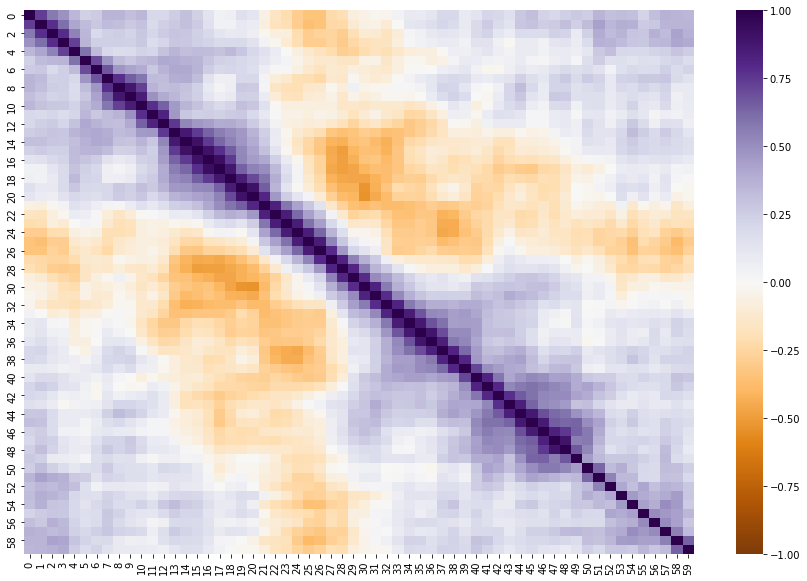

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='PuOr')

In [16]:
array = df.values
X = array[:,0:60].astype(float)
y = array[:,60]

X_train, X_val, y_train, y_val = split(X, y, test_size=0.2, random_state=13)

num_folds = 10
scoring = 'accuracy'

# Linear Algorithms:

Logistic Regression (LA)
Liniar Discriminant Analysis (LDA)

# Nonlinear algorithms:

Classification and Regression Tree (CART)
Support Vector Machine (SVM)
Gaussian Naive Bayes (NB)
K-Nearest Neighbors (KNN)

In [19]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [20]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = 'Model %s: mean: %f std: %f' %(name, cv_results.mean(), cv_results.std())
    print(msg)

Model LR: mean: 0.735662 std: 0.100878
Model LDA: mean: 0.680882 std: 0.076410
Model KNN: mean: 0.759559 std: 0.105036
Model CART: mean: 0.709559 std: 0.096601
Model NB: mean: 0.681618 std: 0.128752
Model SVM: mean: 0.560294 std: 0.163015


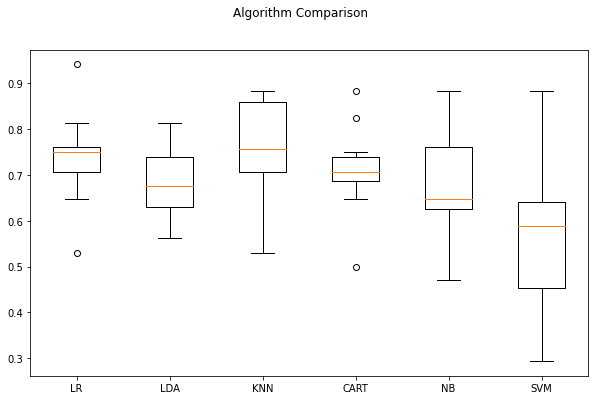

In [21]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Evaluate Algorithm: Standardize Data

In [22]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(gamma='auto'))])))

# Evaluate algorithms on scaled dataset
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = 'Model %s:   mean: %f     std: %f' %(name, cv_results.mean(), cv_results.std())
    print(msg) 

Model ScaledLR:   mean: 0.746324     std: 0.086503
Model ScaledLDA:   mean: 0.680882     std: 0.076410
Model ScaledKNN:   mean: 0.795221     std: 0.105060
Model ScaledCART:   mean: 0.667647     std: 0.054536
Model ScaledNB:   mean: 0.681618     std: 0.128752
Model ScaledSVM:   mean: 0.808456     std: 0.096998


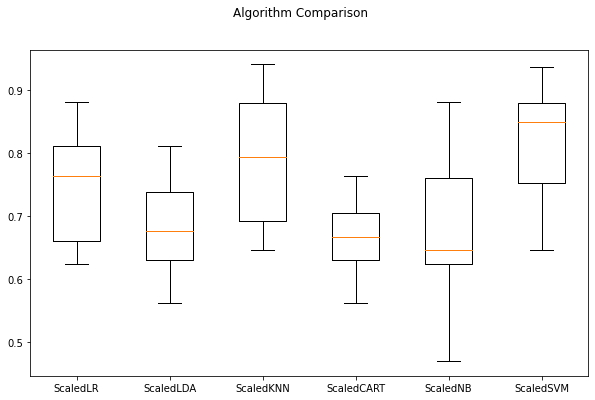

In [23]:
# Box and wisker plots of algorithm preformance
fig = plt.figure(figsize = (10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Algorithm Tuning

In [24]:
# Tuning scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors = neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=13, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring = scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f usinf %s' % (grid_result.best_score_, 
                             grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

# We can see that the optimal configuration is K=1 with accuracy 85.5147%

Best: 0.855147 usinf {'n_neighbors': 1}
0.855147 (0.101449) with: {'n_neighbors': 1}
0.819853 (0.103321) with: {'n_neighbors': 3}
0.801471 (0.114751) with: {'n_neighbors': 5}
0.776838 (0.157875) with: {'n_neighbors': 7}
0.716544 (0.131374) with: {'n_neighbors': 9}
0.710662 (0.120340) with: {'n_neighbors': 11}
0.716176 (0.123639) with: {'n_neighbors': 13}
0.698529 (0.107388) with: {'n_neighbors': 15}
0.709926 (0.111966) with: {'n_neighbors': 17}
0.727941 (0.116666) with: {'n_neighbors': 19}
0.697794 (0.113659) with: {'n_neighbors': 21}


In [25]:
# Tuning scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=13, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# We can see the most accurate configuration was SVM with an RBF kernel and a C = 1.3 with accuracy 82.6471%

Best: 0.826471 using {'C': 1.3, 'kernel': 'rbf'}
0.747426 (0.114692) with: {'C': 0.1, 'kernel': 'linear'}
0.532353 (0.168796) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.185590) with: {'C': 0.1, 'kernel': 'rbf'}
0.675368 (0.143703) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.729412 (0.097467) with: {'C': 0.3, 'kernel': 'linear'}
0.608456 (0.147291) with: {'C': 0.3, 'kernel': 'poly'}
0.729044 (0.106453) with: {'C': 0.3, 'kernel': 'rbf'}
0.746691 (0.121251) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.716544 (0.090286) with: {'C': 0.5, 'kernel': 'linear'}
0.656250 (0.132723) with: {'C': 0.5, 'kernel': 'poly'}
0.741912 (0.116083) with: {'C': 0.5, 'kernel': 'rbf'}
0.758456 (0.081200) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.692647 (0.087593) with: {'C': 0.7, 'kernel': 'linear'}
0.753676 (0.118163) with: {'C': 0.7, 'kernel': 'poly'}
0.765809 (0.105714) with: {'C': 0.7, 'kernel': 'rbf'}
0.752206 (0.088498) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.686765 (0.088477) with: {'C': 0.9, 'kernel': 'linear'

# Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. Let's evaluate four different ensemble machine learning
algorithms:

**Boosting Methods:**
- AdaBoost (AB)
- Gradient Boosting(GBM)

**Bagging Methods:**
- Random Forest (RF)
- Extra Trees (ET)

We will use the same test harness as before, 10-fold cross-validation. 
No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distributions.


In [26]:
#Ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.801471 (0.115045)
GBM: 0.753676 (0.083384)
RF: 0.734926 (0.099488)
ET: 0.777206 (0.092091)


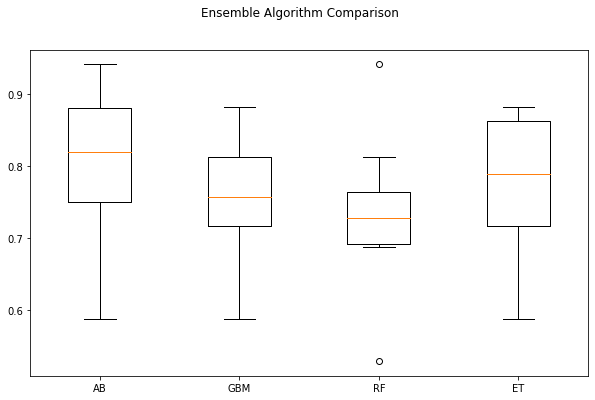

In [27]:
# Compare Algorithms
fig = plt.figure(figsize = (10,6))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Final Model**

In [28]:
# prepare SVC model 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(gamma='auto', C=1.3)
model.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_val)
predictions = model.predict(rescaledValidationX)
print('Accuracy: ', accuracy_score(y_val, predictions))
print('Confusion matrix: \n', confusion_matrix(y_val, predictions))
print('Classification report: \n', classification_report(y_val, predictions))

Accuracy:  0.9285714285714286
Confusion matrix: 
 [[24  1]
 [ 2 15]]
Classification report: 
               precision    recall  f1-score   support

           M       0.92      0.96      0.94        25
           R       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.93      0.92      0.93        42
weighted avg       0.93      0.93      0.93        42

